<a href="https://colab.research.google.com/github/kronze1996/Taxi-trip-time-Prediction/blob/main/Kartikey_Sharma_Team_3_Capstone_Project_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Taxi trip time Prediction : Predicting total ride duration of taxi trips in New York City</u></b>

## <b> Problem Description </b>

### Your task is to build a model that predicts the total ride duration of taxi trips in New York City. Your primary dataset is one released by the NYC Taxi and Limousine Commission, which includes pickup time, geo-coordinates, number of passengers, and several other variables.

## <b> Data Description </b>

### The dataset is based on the 2016 NYC Yellow Cab trip record data made available in Big Query on Google Cloud Platform. The data was originally published by the NYC Taxi and Limousine Commission (TLC). The data was sampled and cleaned for the purposes of this project. Based on individual trip attributes, you should predict the duration of each trip in the test set.

### <b>NYC Taxi Data.csv</b> - the training set (contains 1458644 trip records)


### Data fields
* #### id - a unique identifier for each trip
* #### vendor_id - a code indicating the provider associated with the trip record
* #### pickup_datetime - date and time when the meter was engaged
* #### dropoff_datetime - date and time when the meter was disengaged
* #### passenger_count - the number of passengers in the vehicle (driver entered value)
* #### pickup_longitude - the longitude where the meter was engaged
* #### pickup_latitude - the latitude where the meter was engaged
* #### dropoff_longitude - the longitude where the meter was disengaged
* #### dropoff_latitude - the latitude where the meter was disengaged
* #### store_and_fwd_flag - This flag indicates whether the trip record was held in vehicle memory before sending to the vendor because the vehicle did not have a connection to the server - Y=store and forward; N=not a store and forward trip
* #### trip_duration - duration of the trip in seconds

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#Exploratory Data Analysis

Let's first import all the libraries we will need and fetch the data.

In [ ]:
# Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, auc
from sklearn.tree import DecisionTreeClassifier
from sklearn import ensemble

from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

Reading the dataset.

In [ ]:
path = "/content/drive/MyDrive/AlmaBetter/Cohort Aravali/Module 4/Week 1/NYC Taxi Data.csv"
df = pd.read_csv(path)

In [ ]:
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 11 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   id                  1458644 non-null  object 
 1   vendor_id           1458644 non-null  int64  
 2   pickup_datetime     1458644 non-null  object 
 3   dropoff_datetime    1458644 non-null  object 
 4   passenger_count     1458644 non-null  int64  
 5   pickup_longitude    1458644 non-null  float64
 6   pickup_latitude     1458644 non-null  float64
 7   dropoff_longitude   1458644 non-null  float64
 8   dropoff_latitude    1458644 non-null  float64
 9   store_and_fwd_flag  1458644 non-null  object 
 10  trip_duration       1458644 non-null  int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 122.4+ MB


Good thing we don't have null values

In [ ]:
df.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06
mean,1.534950e+00,1.664530e+00,-7.397349e+01,4.075092e+01,-7.397342e+01,4.075180e+01,9.594923e+02
std,4.987772e-01,1.314242e+00,7.090186e-02,3.288119e-02,7.064327e-02,3.589056e-02,5.237432e+03
min,1.000000e+00,0.000000e+00,-1.219333e+02,3.435970e+01,-1.219333e+02,3.218114e+01,1.000000e+00
25%,1.000000e+00,1.000000e+00,-7.399187e+01,4.073735e+01,-7.399133e+01,4.073588e+01,3.970000e+02
50%,2.000000e+00,1.000000e+00,-7.398174e+01,4.075410e+01,-7.397975e+01,4.075452e+01,6.620000e+02
75%,2.000000e+00,2.000000e+00,-7.396733e+01,4.076836e+01,-7.396301e+01,4.076981e+01,1.075000e+03
max,2.000000e+00,9.000000e+00,-6.133553e+01,5.188108e+01,-6.133553e+01,4.392103e+01,3.526282e+06


In [ ]:
df.shape

(1458644, 11)

Dropping duplicates

In [ ]:
df.drop_duplicates(inplace=True)
df.shape

(1458644, 11)

Checking the passenger_count and number of times a taxi had that particular number of passengers.

In [ ]:
df['passenger_count'].value_counts()

1    1033540
2     210318
5      78088
3      59896
6      48333
4      28404
0         60
7          3
9          1
8          1
Name: passenger_count, dtype: int64

Checking for taxi which had zero passengers

In [ ]:
df[df['passenger_count']==0]

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
62744,id3917283,2,2016-06-06 16:39:09,2016-06-07 16:30:50,0,-73.776367,40.645248,-73.776360,40.645260,N,85901
136519,id3645383,2,2016-01-01 05:01:32,2016-01-01 05:01:36,0,-73.993134,40.757473,-73.993294,40.757538,N,4
194288,id2840829,2,2016-02-21 01:33:52,2016-02-21 01:36:27,0,-73.946243,40.772903,-73.946770,40.774841,N,155
217765,id3762593,1,2016-01-04 12:24:17,2016-01-04 13:01:48,0,-73.815224,40.700081,-73.950699,40.755222,N,2251
263809,id2154895,1,2016-05-23 23:37:37,2016-05-23 23:37:45,0,-73.861633,40.705029,-73.861633,40.705029,N,8
278290,id0796773,1,2016-02-07 17:23:48,2016-02-07 17:23:57,0,-73.954941,40.687866,-73.954742,40.687862,N,9
301600,id2091096,2,2016-01-01 23:52:46,2016-01-02 00:27:18,0,-73.993652,40.757046,-73.918869,40.757793,N,2072
303133,id0414625,2,2016-01-05 18:52:20,2016-01-05 18:52:35,0,-73.985291,40.738335,-73.985352,40.738361,N,15
337809,id0271506,2,2016-05-22 00:23:15,2016-05-22 00:23:56,0,-73.956718,40.777142,-73.956764,40.776958,N,41
375972,id3176865,2,2016-05-31 05:10:23,2016-05-31 05:10:38,0,-73.982468,40.727974,-73.982468,40.728001,N,15


As we know we donot require the data of taxi that has zero passengers so let's drop them.

In [ ]:
df=df[df['passenger_count']!=0]

In [ ]:
df['vendor_id'].value_counts()

2    780273
1    678311
Name: vendor_id, dtype: int64

Checking data type of datetime column.

In [ ]:
df["pickup_datetime"][0]

'2016-03-14 17:24:55'

Converting it from string to date time

In [ ]:
df['pickup_datetime']=pd.to_datetime(df['pickup_datetime'])
df['dropoff_datetime']=pd.to_datetime(df['dropoff_datetime'])
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


In [ ]:
df['pickup_datetime']

0         2016-03-14 17:24:55
1         2016-06-12 00:43:35
2         2016-01-19 11:35:24
3         2016-04-06 19:32:31
4         2016-03-26 13:30:55
                  ...        
1458639   2016-04-08 13:31:04
1458640   2016-01-10 07:35:15
1458641   2016-04-22 06:57:41
1458642   2016-01-05 15:56:26
1458643   2016-04-05 14:44:25
Name: pickup_datetime, Length: 1458584, dtype: datetime64[ns]

In [ ]:
df['dropoff_datetime']

0         2016-03-14 17:32:30
1         2016-06-12 00:54:38
2         2016-01-19 12:10:48
3         2016-04-06 19:39:40
4         2016-03-26 13:38:10
                  ...        
1458639   2016-04-08 13:44:02
1458640   2016-01-10 07:46:10
1458641   2016-04-22 07:10:25
1458642   2016-01-05 16:02:39
1458643   2016-04-05 14:47:43
Name: dropoff_datetime, Length: 1458584, dtype: datetime64[ns]

Let's plot the boxplot graph and do some outlier detection

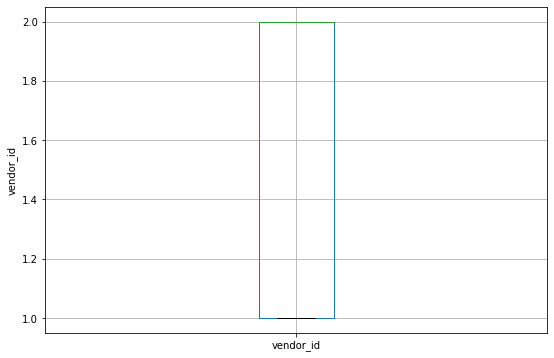

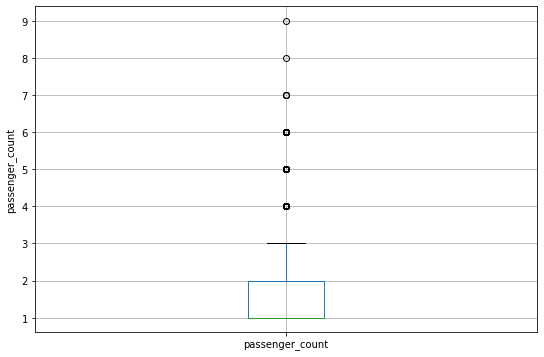

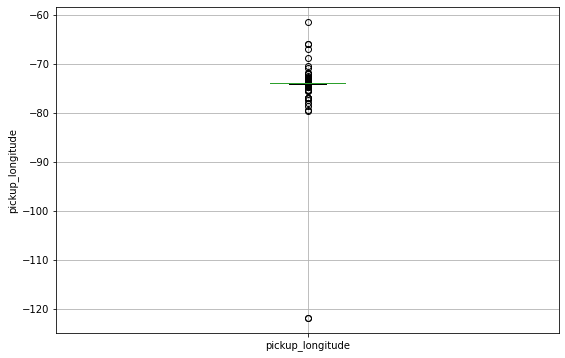

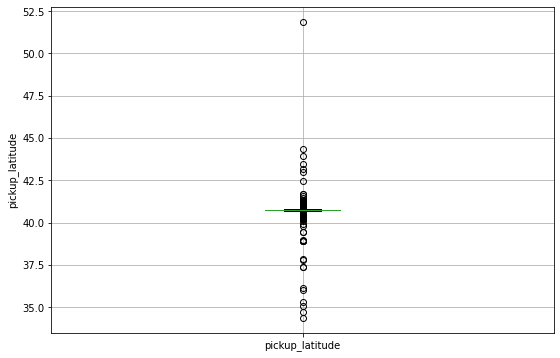

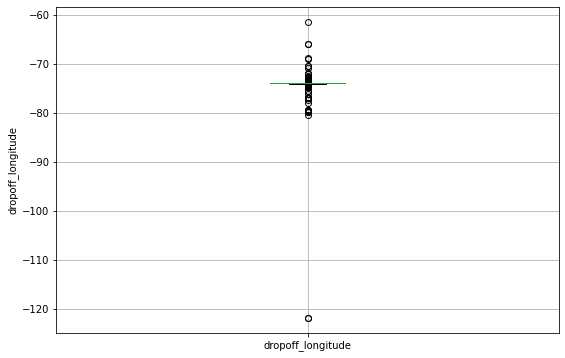

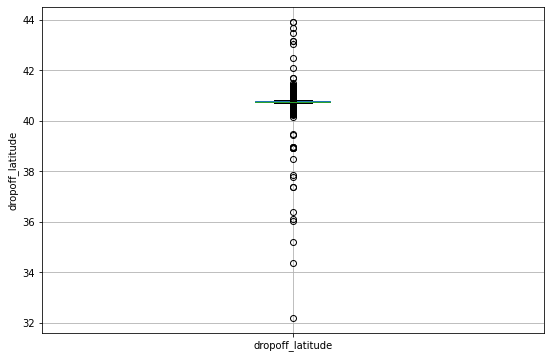

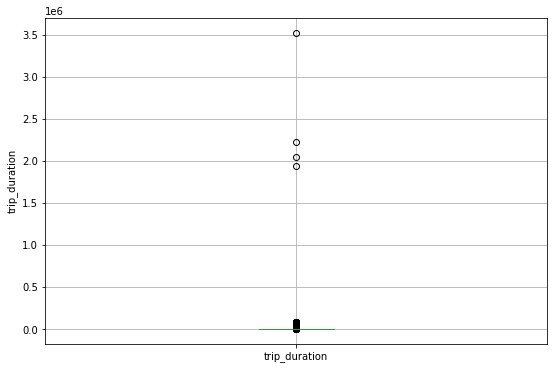

In [ ]:
# plot a boxplot for the label by each categorical feature  
for col in df.describe().columns:
  fig = plt.figure(figsize=(9, 6))
  ax = fig.gca()
  df.boxplot(column = col, ax = ax)
  ax.set_ylabel(col)
plt.show()

Here we can see alot of outliers now let's just drop the outliers and then see the shape of our data

In [ ]:
#In this case, we consider outliers as rows that have at least two outlied numerical values.
#The optimal value for this parameter can be later determined through the cross-validation 
from collections import Counter
n = 1
indexes = [] 
 
for col in df.describe().columns: 
    Q1 = np.percentile(df[col], 25) 
    Q3 = np.percentile(df[col],75) 
    IQR = Q3 - Q1 
 
    limit = 1.5 * IQR 
 
    list_outliers = df[(df[col] < Q1 - limit) | (df[col] > Q3 + limit )].index # Determine a list of indices of outliers for feature col 
 
    indexes.extend(list_outliers) # append the found outlier indices for col to the list of outlier indices 
 
indexes = Counter(indexes) 
multiple_outliers = list( k for k, v in indexes.items() if v > n )

In [ ]:
df.drop(multiple_outliers, axis = 0) 
df = df.drop(multiple_outliers, axis = 0).reset_index(drop=True)

Plotting box plot for outlier check

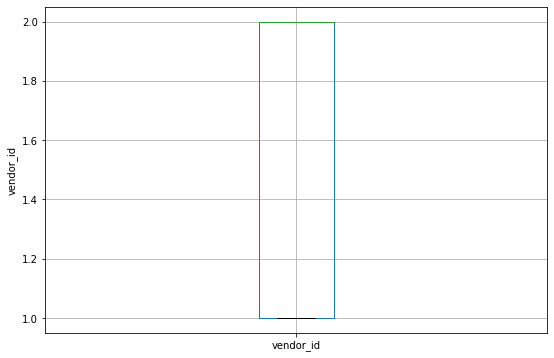

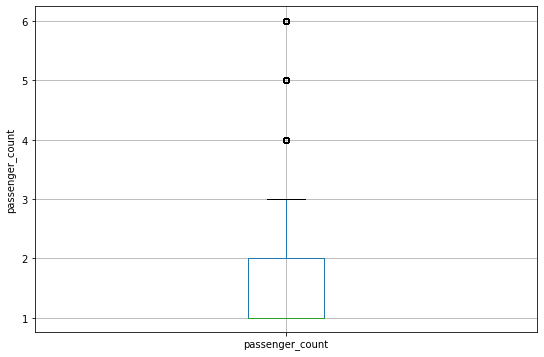

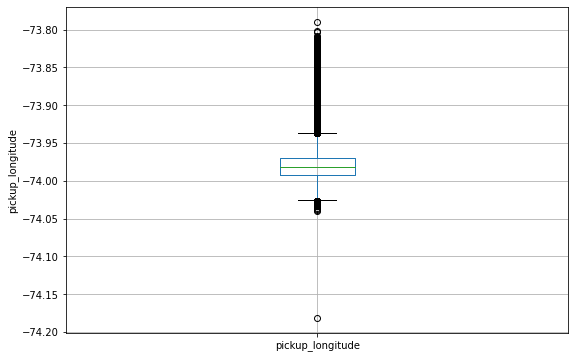

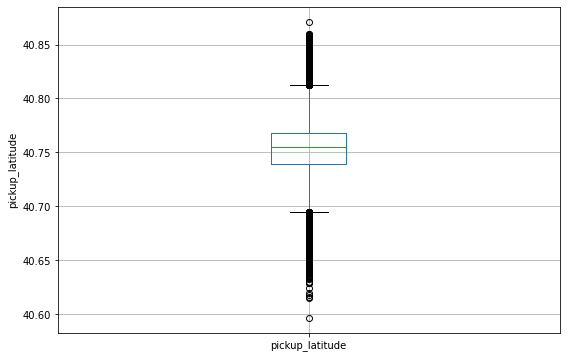

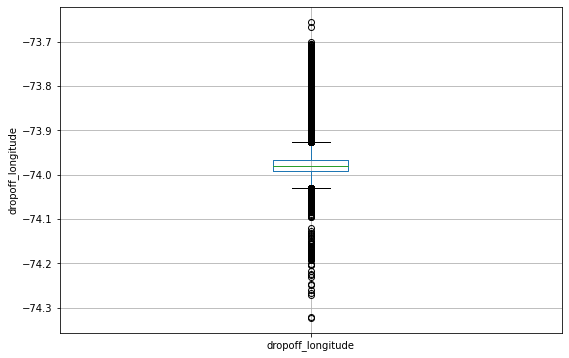

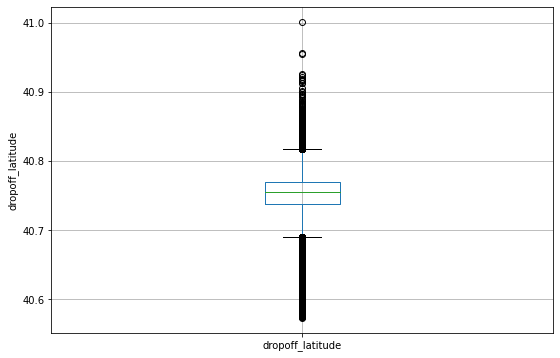

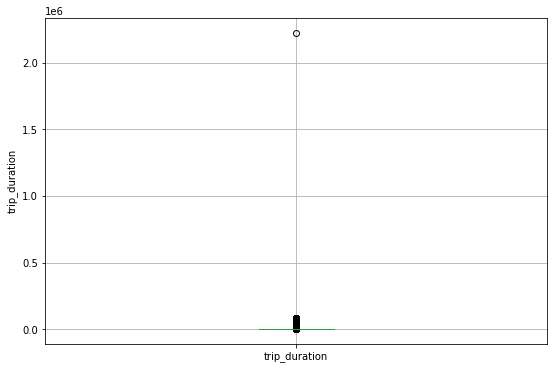

In [ ]:
# plot a boxplot for the label by each categorical feature  
for col in df.describe().columns:
  fig = plt.figure(figsize=(9, 6))
  ax = fig.gca()
  df.boxplot(column = col, ax = ax)
  ax.set_ylabel(col)
plt.show()

In [ ]:
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


In [ ]:
df.shape

(1347057, 11)

*Okay, so the data looks fine for now let's explore it more and make some conclusions.*

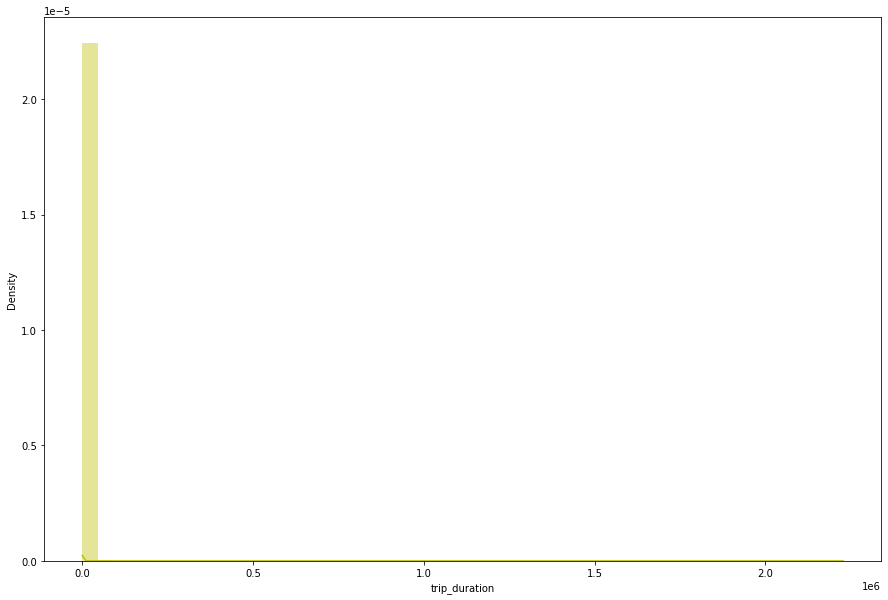

In [ ]:
# Dependent variable 'trip_duration'
plt.figure(figsize=(15,10))
sns.distplot(df['trip_duration'],color="y")

As we can see skewness in our data we can let's try to do log transform to normalize our data

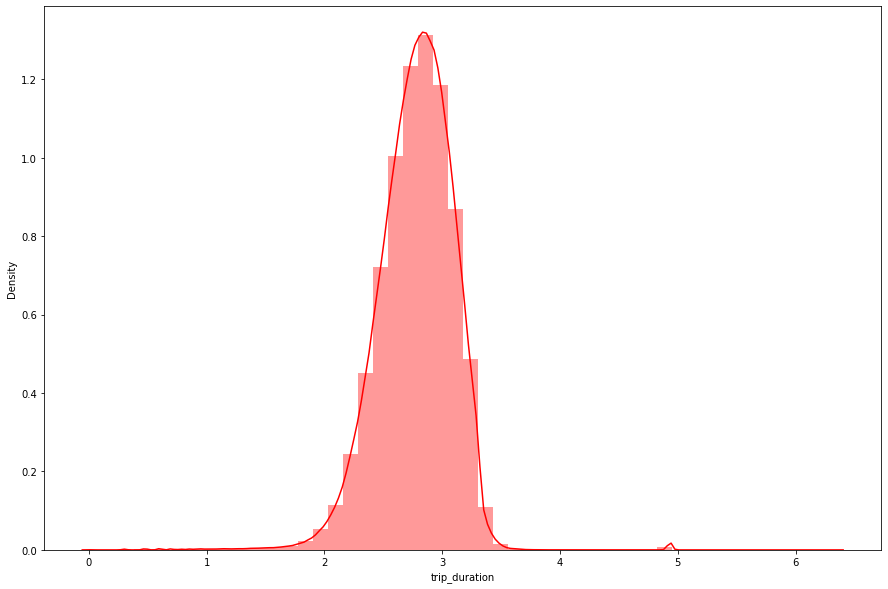

In [ ]:
plt.figure(figsize=(15,10))
sns.distplot(np.log10(df['trip_duration']),color="R")

Plotting all the numerical features with respect to trip duration to check linear regression between our dependent and independent variables

In [ ]:
numeric_features = df.describe().columns
numeric_features

Index(['vendor_id', 'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'trip_duration'],
      dtype='object')

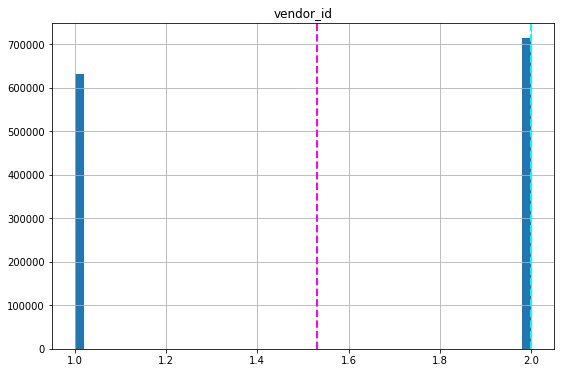

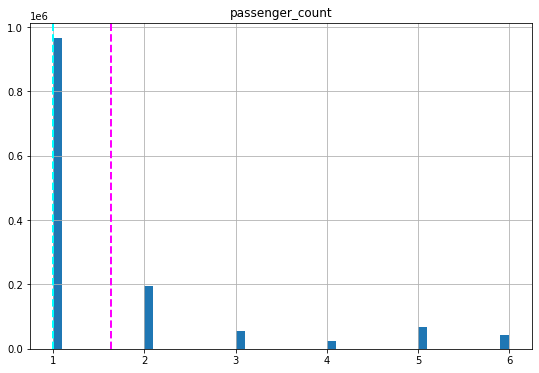

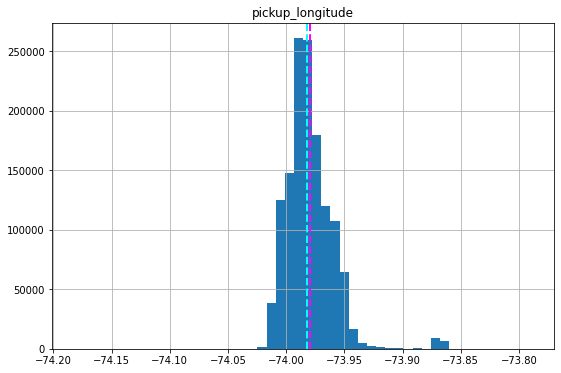

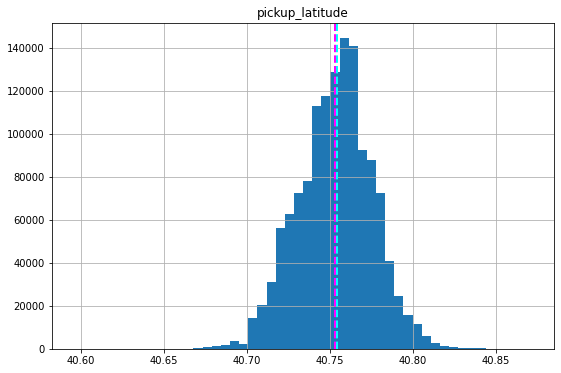

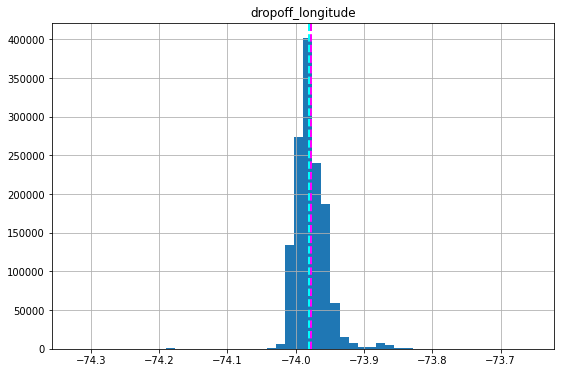

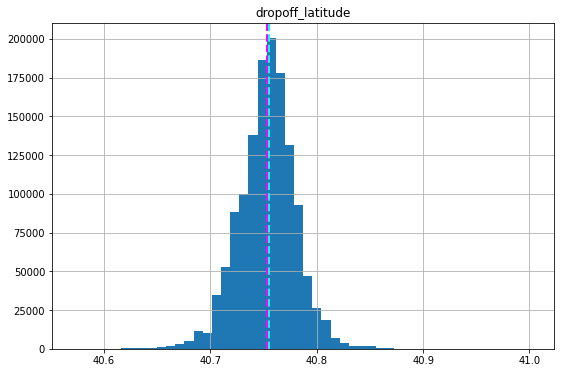

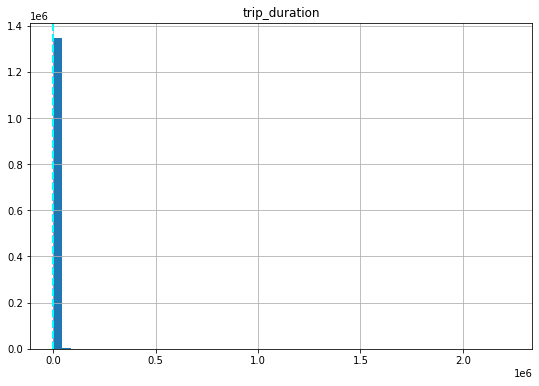

In [ ]:
# plot a bar plot for each categorical feature count
for col in numeric_features:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = df[col]
    feature.hist(bins=50, ax = ax)
    ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)    
    ax.set_title(col)
plt.show()

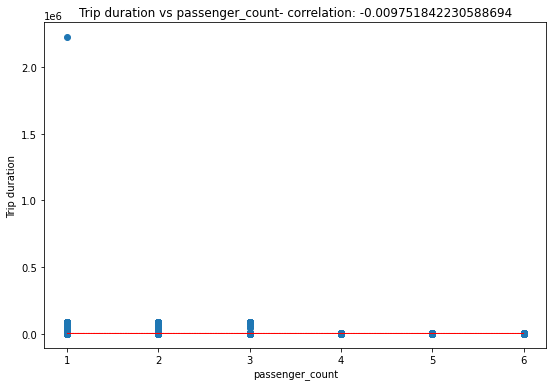

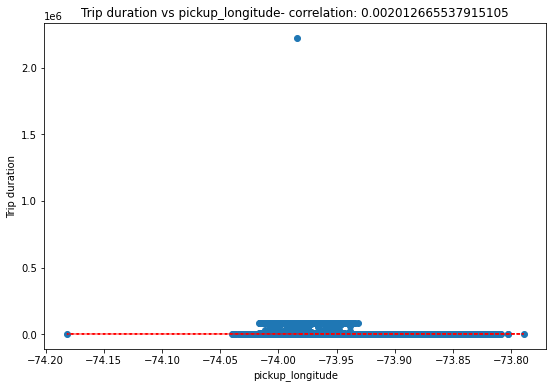

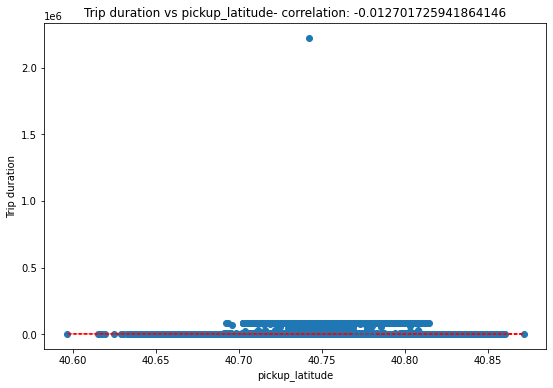

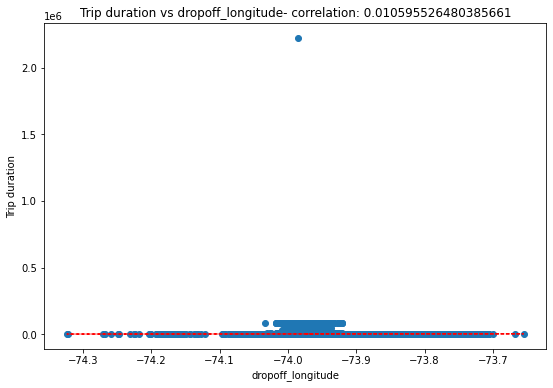

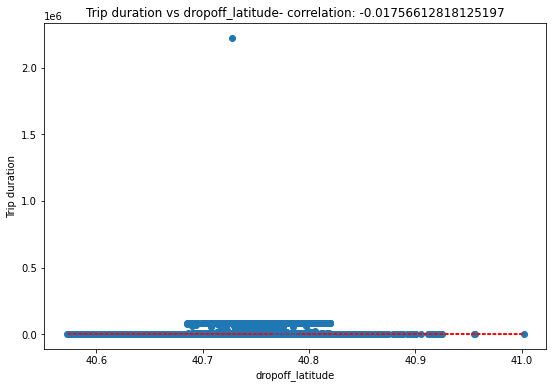

In [ ]:
for col in numeric_features[1:-1]:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = df[col]
    label = df['trip_duration']
    correlation = feature.corr(label)
    plt.scatter(x=feature, y=label)
    plt.xlabel(col)
    plt.ylabel('Trip duration')
    ax.set_title('Trip duration vs ' + col + '- correlation: ' + str(correlation))
    z = np.polyfit(df[col], df['trip_duration'], 1)
    y_hat = np.poly1d(z)(df[col])

    plt.plot(df[col], y_hat, "r--", lw=1)

plt.show()

After looking how these independent variables are dependent on our dependent variable, we will do some feature engineering to build some more sensible features and make some prediction on our data.


##Feature engineering

So for our feature engineering task we will first need a variable that will give us the day of that particular pickup date

In [ ]:
df['pickup_day']=df['pickup_datetime'].dt.day_name()
df['dropoff_day']=df['dropoff_datetime'].dt.day_name()

In [ ]:
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_day,dropoff_day
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,Monday,Monday
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,Sunday,Sunday
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,Tuesday,Tuesday
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,Wednesday,Wednesday
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,Saturday,Saturday


Now that we have gotten the day let's see how it looks like

In [ ]:
df['pickup_day'].value_counts()

Saturday     206464
Friday       206187
Thursday     201261
Wednesday    194686
Tuesday      187727
Sunday       179100
Monday       171632
Name: pickup_day, dtype: int64

In [ ]:
df["dropoff_day"].value_counts()

Saturday     206382
Friday       205728
Thursday     200627
Wednesday    194377
Tuesday      187490
Sunday       180848
Monday       171605
Name: dropoff_day, dtype: int64

Plotting the number of pickups on each day for better visualization

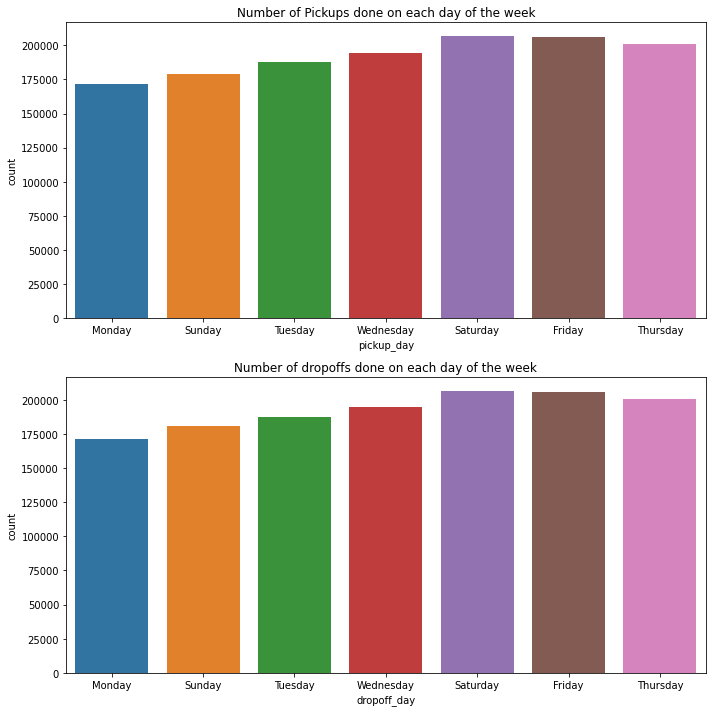

In [ ]:
figure,ax=plt.subplots(nrows=2,ncols=1,figsize=(10,10))
sns.countplot(x='pickup_day',data=df,ax=ax[0])
ax[0].set_title('Number of Pickups done on each day of the week')
sns.countplot(x='dropoff_day',data=df,ax=ax[1])
ax[1].set_title('Number of dropoffs done on each day of the week')
plt.tight_layout()

We can also divide our time into morning, midday, evening and late night for calculating the taxi booked more at what time.

In [ ]:
import datetime
def timezone(x):
    if x>=datetime.time(4, 0, 1) and x <=datetime.time(10, 0, 0):
        return 'morning'
    elif x>=datetime.time(10, 0, 1) and x <=datetime.time(16, 0, 0):
        return 'midday'
    elif x>=datetime.time(16, 0, 1) and x <=datetime.time(22, 0, 0):
        return 'evening'
    elif x>=datetime.time(22, 0, 1) or x <=datetime.time(4, 0, 0):
        return 'late night'
    
df['pickup_timezone']=df['pickup_datetime'].apply(lambda x :timezone(datetime.datetime.strptime(str(x), "%Y-%m-%d %H:%M:%S").time()) )
df['dropoff_timezone']=df['dropoff_datetime'].apply(lambda x :timezone(datetime.datetime.strptime(str(x), "%Y-%m-%d %H:%M:%S").time()) )

Below we can see that our taxi were most booked on the day of friday

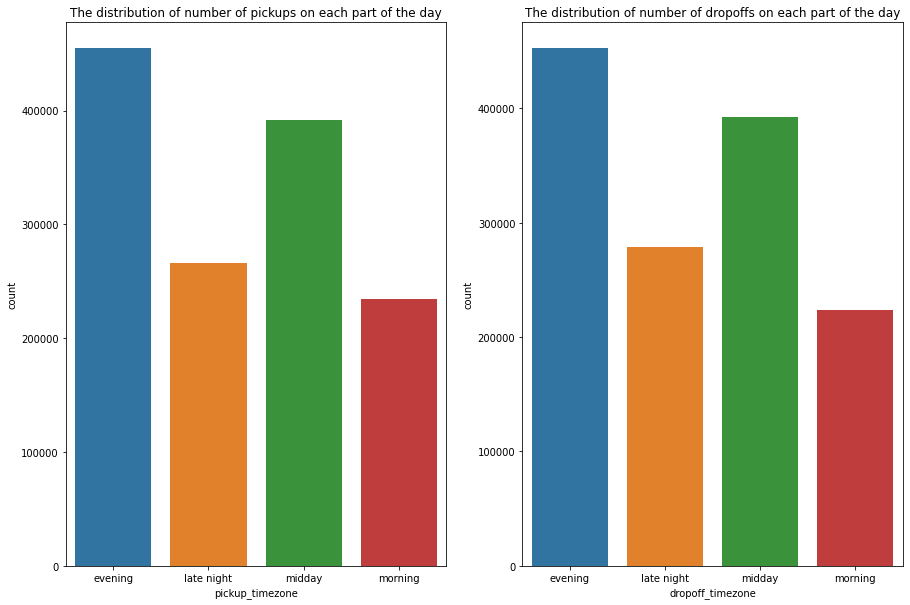

In [ ]:
figure,ax=plt.subplots(nrows=1,ncols=2,figsize=(15,10))
sns.countplot(x='pickup_timezone',data=df,ax=ax[0])
ax[0].set_title('The distribution of number of pickups on each part of the day')
sns.countplot(x='dropoff_timezone',data=df,ax=ax[1])
ax[1].set_title('The distribution of number of dropoffs on each part of the day')
plt.show()

Further we will also seggregate the months and 

In [ ]:
df['pickup_month']=df['pickup_datetime'].dt.month
df['dropoff_month']=df['dropoff_datetime'].dt.month

In [ ]:
df['pickup_month'].value_counts()

3    237409
4    232799
5    227164
2    222208
6    214296
1    213181
Name: pickup_month, dtype: int64

In [ ]:
df['dropoff_month'].value_counts()

3    237369
4    232788
5    227222
2    222195
6    214240
1    213151
7        92
Name: dropoff_month, dtype: int64

We'll now use latitude and longitude given to us from the dataset to calculate the distance feature


In [ ]:
#a function is created to calculate the distance from latitudes and longitudes
from math import radians, cos, sin, asin, sqrt
def haversine(df):
    lat1, lon1, lat2, lon2 = df.pickup_latitude,df.pickup_longitude,df.dropoff_latitude,df.dropoff_longitude 
    R = 3959.87433 # this is in miles.  For Earth radius in kilometers use 6372.8 km
    dLat = radians(lat2 - lat1)
    dLon = radians(lon2 - lon1)
    lat1 = radians(lat1)
    lat2 = radians(lat2)
    a = sin(dLat/2)**2 + cos(lat1)*cos(lat2)*sin(dLon/2)**2
    c = 2*asin(sqrt(a))
    return R * c

In [ ]:
df['distance'] = df.apply(lambda x: haversine(x), axis = 1)
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_day,dropoff_day,pickup_timezone,dropoff_timezone,pickup_month,dropoff_month,distance
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,Monday,Monday,evening,evening,3,3,0.931401
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,Sunday,Sunday,late night,late night,6,6,1.122207
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,Tuesday,Tuesday,midday,midday,1,1,3.968637
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,Wednesday,Wednesday,evening,evening,4,4,0.923307
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,Saturday,Saturday,midday,midday,3,3,0.738763


Checking for number of rows with distance zero

In [ ]:
len(df[df.distance==0])

4169

Now dropping these useless data from the dataframe

In [ ]:
df=df[df['distance']!=0]
df.shape

(1342888, 18)

Now let's try to plot the relationship of distance with our dependent variable "trip_duration"

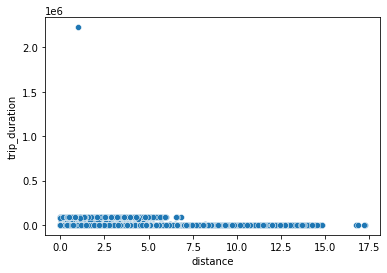

In [ ]:
sns.scatterplot(x='distance',y='trip_duration',data=df)

Now let's make a new feature named trip duration hour and speed from our distance and trip duration

In [ ]:
df['trip_duration_hour']=df['trip_duration']/3600

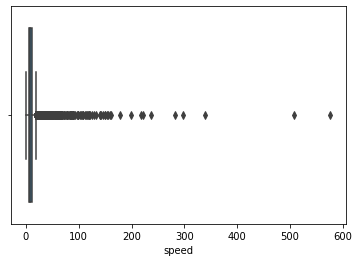

In [ ]:
df['speed']=df['distance']/df['trip_duration_hour']
sns.boxplot(df['speed'])

In [ ]:
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_day,dropoff_day,pickup_timezone,dropoff_timezone,pickup_month,dropoff_month,distance,trip_duration_hour,speed
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,Monday,Monday,evening,evening,3,3,0.931401,0.126389,7.369324
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,Sunday,Sunday,late night,late night,6,6,1.122207,0.184167,6.093432
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,Tuesday,Tuesday,midday,midday,1,1,3.968637,0.590000,6.726504
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,Wednesday,Wednesday,evening,evening,4,4,0.923307,0.119167,7.748028
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,Saturday,Saturday,midday,midday,3,3,0.738763,0.120833,6.113903


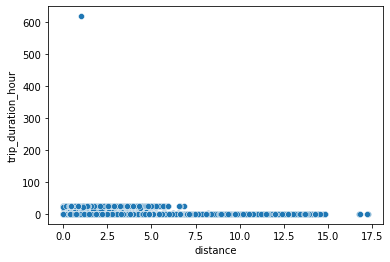

In [ ]:
sns.scatterplot(x='distance',y='trip_duration_hour',data=df)

Now making a graph between the trip duration and the log distance so we get a graph between normalized data

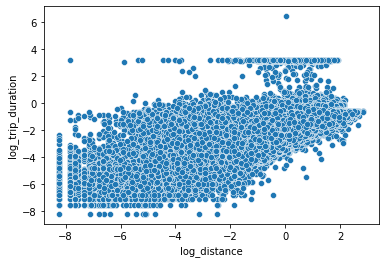

In [ ]:
df['log_distance']=np.log(df.distance)
df['log_trip_duration']=np.log(df.trip_duration_hour)
sns.scatterplot(x='log_distance',y='log_trip_duration',data=df)

In [ ]:
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_day,dropoff_day,pickup_timezone,dropoff_timezone,pickup_month,dropoff_month,distance,trip_duration_hour,speed,log_distance,log_trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,Monday,Monday,evening,evening,3,3,0.931401,0.126389,7.369324,-0.071066,-2.068392
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,Sunday,Sunday,late night,late night,6,6,1.122207,0.184167,6.093432,0.115297,-1.691914
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,Tuesday,Tuesday,midday,midday,1,1,3.968637,0.590000,6.726504,1.378423,-0.527633
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,Wednesday,Wednesday,evening,evening,4,4,0.923307,0.119167,7.748028,-0.079794,-2.127232
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,Saturday,Saturday,midday,midday,3,3,0.738763,0.120833,6.113903,-0.302778,-2.113343


Now let's do some one hot encoding

We have converted the weeks and store_and_fwd_flag as one hot encoding variables and made them into 0 and 1 values

In [ ]:
# One-hot encoding
df=pd.get_dummies(df,columns=['store_and_fwd_flag','pickup_day','dropoff_day','pickup_month','dropoff_month','pickup_timezone', 'dropoff_timezone'])

In [ ]:
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,distance,trip_duration_hour,speed,log_distance,log_trip_duration,store_and_fwd_flag_N,store_and_fwd_flag_Y,pickup_day_Friday,pickup_day_Monday,pickup_day_Saturday,pickup_day_Sunday,pickup_day_Thursday,pickup_day_Tuesday,pickup_day_Wednesday,dropoff_day_Friday,dropoff_day_Monday,dropoff_day_Saturday,dropoff_day_Sunday,dropoff_day_Thursday,dropoff_day_Tuesday,dropoff_day_Wednesday,pickup_month_1,pickup_month_2,pickup_month_3,pickup_month_4,pickup_month_5,pickup_month_6,dropoff_month_1,dropoff_month_2,dropoff_month_3,dropoff_month_4,dropoff_month_5,dropoff_month_6,dropoff_month_7,pickup_timezone_evening,pickup_timezone_late night,pickup_timezone_midday,pickup_timezone_morning,dropoff_timezone_evening,dropoff_timezone_late night,dropoff_timezone_midday,dropoff_timezone_morning
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,455,0.931401,0.126389,7.369324,-0.071066,-2.068392,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,663,1.122207,0.184167,6.093432,0.115297,-1.691914,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,2124,3.968637,0.590000,6.726504,1.378423,-0.527633,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,429,0.923307,0.119167,7.748028,-0.079794,-2.127232,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,435,0.738763,0.120833,6.113903,-0.302778,-2.113343,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0


#Linear Regression

To perfroming linear regression we knoe there are assumptions. Given below are the basic assumptions that a linear regression model makes regarding a dataset on which it is applied:

* **Linear relationship**: Relationship between response and feature variables should be linear. The linearity assumption can be tested using scatter plots.
* **Little or no multi-collinearity**: It is assumed that there is little or no multicollinearity in the data. Multicollinearity occurs when the features (or independent variables) are not independent from each other.
* **Little or no auto-correlation**: Another assumption is that there is little or no autocorrelation in the data. Autocorrelation occurs when the residual errors are not independent from each other.
* **Homoscedasticity**: Homoscedasticity describes a situation in which the error term (that is, the “noise” or random disturbance in the relationship between the independent variables and the dependent variable) is the same across all values of the independent variables.

***So keeping that in mind let's do our linear regression task. Firstly we will check the linear relationship or our dependent(trip_duration_hours) and independent variables***

##Multi-collinearity Check

In [ ]:
df.corr()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,distance,trip_duration_hour,speed,log_distance,log_trip_duration,store_and_fwd_flag_N,store_and_fwd_flag_Y,pickup_day_Friday,pickup_day_Monday,pickup_day_Saturday,pickup_day_Sunday,pickup_day_Thursday,pickup_day_Tuesday,pickup_day_Wednesday,dropoff_day_Friday,dropoff_day_Monday,dropoff_day_Saturday,dropoff_day_Sunday,dropoff_day_Thursday,dropoff_day_Tuesday,dropoff_day_Wednesday,pickup_month_1,pickup_month_2,pickup_month_3,pickup_month_4,pickup_month_5,pickup_month_6,dropoff_month_1,dropoff_month_2,dropoff_month_3,dropoff_month_4,dropoff_month_5,dropoff_month_6,dropoff_month_7,pickup_timezone_evening,pickup_timezone_late night,pickup_timezone_midday,pickup_timezone_morning,dropoff_timezone_evening,dropoff_timezone_late night,dropoff_timezone_midday,dropoff_timezone_morning
vendor_id,1.000000,0.281247,0.003857,0.010372,-0.004056,0.008592,0.022324,-0.011766,0.022324,-0.004531,-0.002438,0.003613,0.075405,-0.075405,-0.001178,-0.000690,0.000830,0.002912,-0.001766,0.001656,-0.001641,-0.001218,-0.000570,0.000598,0.003257,-0.001939,0.001448,-0.001448,0.004827,0.002702,0.001662,-0.002604,-0.002616,-0.003920,0.004798,0.002690,0.001718,-0.002625,-0.002623,-0.003898,-0.000497,0.008959,-0.003800,-0.000380,-0.006731,0.008611,-0.003109,0.000349,-0.007973
passenger_count,0.281247,1.000000,-0.029457,-0.003185,-0.031469,0.002189,-0.009810,-0.044059,-0.009810,-0.028286,-0.023710,-0.012649,0.020670,-0.020670,-0.001070,-0.009090,0.022403,0.015077,-0.008671,-0.009212,-0.009931,-0.001213,-0.009071,0.022149,0.015512,-0.008690,-0.009263,-0.009976,0.003542,-0.000409,-0.000623,0.001189,-0.001256,-0.002413,0.003567,-0.000418,-0.000635,0.001204,-0.001253,-0.002389,-0.002121,0.007888,0.008900,0.004459,-0.024530,0.007758,0.008995,0.004031,-0.024561
pickup_longitude,0.003857,-0.029457,1.000000,0.584749,0.284241,0.267906,0.002109,0.158222,0.002109,0.143514,0.084237,0.008293,-0.009502,0.009502,-0.001107,0.021092,-0.030567,-0.006029,0.001594,0.011224,0.005599,-0.001112,0.021367,-0.029856,-0.007954,0.001871,0.011712,0.005751,0.005512,0.000937,-0.000078,-0.002430,-0.001644,-0.002175,0.005483,0.000921,-0.000045,-0.002361,-0.001709,-0.002115,-0.002336,0.002789,-0.075968,0.037369,0.031539,0.004721,-0.073467,0.037933,0.027666
pickup_latitude,0.010372,-0.003185,0.584749,1.000000,0.249879,0.509920,-0.012711,-0.058209,-0.012711,0.034855,-0.056734,-0.088818,0.000499,-0.000499,0.001057,0.021539,-0.038892,-0.026650,0.008497,0.019857,0.015900,0.001321,0.021709,-0.038479,-0.028509,0.009014,0.020166,0.016153,0.003334,0.000188,-0.001613,-0.003004,0.001029,0.000215,0.003350,0.000187,-0.001596,-0.002972,0.000991,0.000274,-0.003811,0.013919,-0.145604,0.076439,0.043986,0.019700,-0.145301,0.076892,0.039280
dropoff_longitude,-0.004056,-0.031469,0.284241,0.249879,1.000000,0.470714,0.010674,0.253411,0.010674,0.213816,0.177460,0.064277,-0.005875,0.005875,0.002292,0.007046,-0.018972,0.006703,-0.000257,0.001326,0.002890,0.002537,0.007018,-0.018490,0.006271,-0.000087,0.001141,0.002576,-0.000167,-0.003286,0.000309,0.001505,0.002981,-0.001429,-0.000183,-0.003270,0.000273,0.001537,0.002965,-0.001434,0.001154,-0.027877,0.046866,-0.025311,0.015878,-0.029809,0.044920,-0.028242,0.023424
dropoff_latitude,0.008592,0.002189,0.267906,0.509920,0.470714,1.000000,-0.017583,-0.059755,-0.017583,0.091015,-0.050658,-0.111855,0.003792,-0.003792,-0.000682,0.013828,-0.028034,-0.013011,0.005063,0.012728,0.011201,-0.000679,0.014240,-0.027909,-0.014033,0.005432,0.012622,0.011468,0.000306,-0.002611,-0.001224,-0.001059,0.003246,0.001391,0.000300,-0.002580,-0.001231,-0.001016,0.003202,0.001436,-0.002809,0.014114,-0.091151,0.050814,0.017251,0.020072,-0.092705,0.047905,0.016945
trip_duration,0.022324,-0.009810,0.002109,-0.012711,0.010674,-0.017583,1.000000,0.094185,1.000000,-0.067004,0.093790,0.306968,0.000030,-0.000030,0.003097,-0.007292,-0.000640,-0.006133,0.004762,0.002925,0.002612,0.001369,-0.002648,-0.002

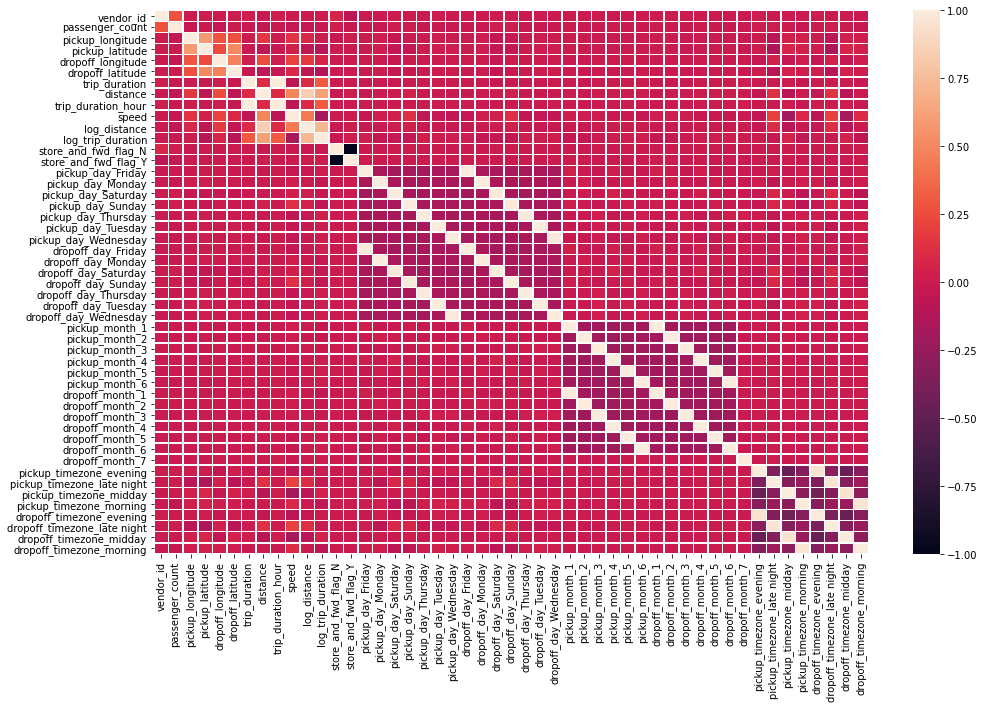

In [ ]:
plt.figure (figsize= (16,10))
sns.heatmap(df.corr(),linewidths=.5)

Now we will define our features for the metrics of linear regression

In [ ]:
final_df=df.sample(frac=0.5)#20 percent or 30
features=final_df.describe().columns

Calculating Zscore of our numerical features present in our dataframe

In [ ]:
from scipy.stats import zscore
X = final_df[features].apply(zscore)

In [ ]:
X

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,distance,trip_duration_hour,speed,log_distance,log_trip_duration,store_and_fwd_flag_N,store_and_fwd_flag_Y,pickup_day_Friday,pickup_day_Monday,pickup_day_Saturday,pickup_day_Sunday,pickup_day_Thursday,pickup_day_Tuesday,pickup_day_Wednesday,dropoff_day_Friday,dropoff_day_Monday,dropoff_day_Saturday,dropoff_day_Sunday,dropoff_day_Thursday,dropoff_day_Tuesday,dropoff_day_Wednesday,pickup_month_1,pickup_month_2,pickup_month_3,pickup_month_4,pickup_month_5,pickup_month_6,dropoff_month_1,dropoff_month_2,dropoff_month_3,dropoff_month_4,dropoff_month_5,dropoff_month_6,dropoff_month_7,pickup_timezone_evening,pickup_timezone_late night,pickup_timezone_midday,pickup_timezone_morning,dropoff_timezone_evening,dropoff_timezone_late night,dropoff_timezone_midday,dropoff_timezone_morning
1224876,0.941118,0.288092,0.947903,0.788100,0.976730,0.906537,-0.187259,-0.798297,-0.187259,2.296938,-0.991227,-2.415637,0.071309,-0.071309,-0.425042,-0.382829,-0.425652,-0.390945,-0.41930,-0.402427,2.435210,-0.424446,-0.382765,-0.425608,-0.393162,-0.418573,-0.402072,2.437445,-0.433787,-0.444157,-0.463168,-0.457033,-0.449589,2.297312,-0.433746,-0.44414,-0.463133,-0.457007,-0.449663,2.297733,-0.008801,-0.713304,-0.496966,1.563423,-0.459581,-0.710712,-0.511272,1.561950,-0.446863
303705,0.941118,0.288092,-0.975763,-0.691268,-1.180017,-0.931689,-0.179201,-0.687836,-0.179201,2.268989,-0.686243,-2.056013,0.071309,-0.071309,-0.425042,-0.382829,-0.425652,-0.390945,-0.41930,2.484925,-0.410642,-0.424446,-0.382765,-0.425608,-0.393162,-0.418573,2.487118,-0.410266,-0.433787,-0.444157,-0.463168,-0.457033,-0.449589,2.297312,-0.433746,-0.44414,-0.463133,-0.457007,-0.449663,2.297733,-0.008801,-0.713304,2.012208,-0.639622,-0.459581,-0.710712,1.955906,-0.640226,-0.446863
284219,0.941118,1.070842,-0.653206,-1.439173,-1.530041,-1.846454,-0.060156,-0.064140,-0.060156,0.241472,0.299261,-0.006622,0.071309,-0.071309,-0.425042,-0.382829,-0.425652,2.557904,-0.41930,-0.402427,-0.410642,-0.424446,-0.382765,-0.425608,2.543479,-0.418573,-0.402072,-0.410266,-0.433787,-0.444157,-0.463168,-0.457033,-0.449589,2.297312,-0.433746,-0.44414,-0.463133,-0.457007,-0.449663,2.297733,-0.008801,-0.713304,2.012208,-0.639622,-0.459581,-0.710712,1.955906,-0.640226,-0.446863
720855,-1.062566,0.288092,-0.598474,-0.194264,1.025200,0.881594,0.175596,0.793621,0.175596,-0.411826,0.987544,1.282057,0.071309,-0.071309,2.352710,-0.382829,-0.425652,-0.390945,-0.41930,-0.402427,-0.410642,2.356014,-0.382765,-0.425608,-0.393162,-0.418573,-0.402072,-0.410266,-0.433787,-0.444157,2.159042,-0.457033,-0.449589,-0.435291,-0.433746,-0.44414,2.159208,-0.457007,-0.449663,-0.435211,-0.008801,-0.713304,-0.496966,1.563423,-0.459581,-0.710712,-0.511272,1.561950,-0.446863
298555,-1.062566,-0.494657,0.055762,-0.556656,-0.385957,-0.894060,-0.162046,-0.553636,-0.162046,1.662473,-0.396387,-1.506053,0.071309,-0.071309,-0.425042,-0.382829,-0.425652,-0.390945,-0.41930,-0.402427,2.435210,-0.424446,-0.382765,-0.425608,-0.393162,-0.418573,-0.402072,2.437445,2.305277,-0.444157,-0.463168,-0.457033,-0.449589,-0.435291,2.305496,-0.44414,-0.463133,-0.457007,-0.449663,-0.435211,-0.008801,1.401928,-0.496966,-0.639622,-0.459581,1.407039,-0.511272,-0.640226,-0.446863
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
815077,0.941118,-0.494657,5.120345,-0.846604,-0.875861,-0.303981,0.058370,3.475653,0.058370,3.180888,2.024685,0.785299,0.071309,-0.071309,-0.425042,-0.382829,-0.425652,2.557904,-0.41930,-0.402427,-0.410642,-0.424446,-0.382765,-0.425608,2.543479,-0.418573,-0.402072,-0.410266,-0.433787,-0.444157,-0.463168,2.188027,-0.449589,-0.435291,-0.433746,-0.44414,-0.463133,2.188152,-0.449663,-0.435211,-0.008801,-0.713304,-0.496966,-0.639622,2.175896,-0.710712,-0.511272,-0.640226,2.237824
558646,0.9

In [ ]:
y = np.log10(final_df['trip_duration_hour'])

In [ ]:
y

1224876   -1.535113
303705    -1.422764
284219    -0.782516
720855    -0.379922
298555    -1.250951
             ...   
815077    -0.535113
558646    -0.572676
25534     -1.236156
485312    -0.727643
238527    -0.467812
Name: trip_duration_hour, Length: 671444, dtype: float64

#Linear Regression

In [ ]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split( X,y , test_size = 0.2, random_state = 0) 
print(X_train.shape)
print(X_test.shape)

(537155, 49)
(134289, 49)


In [ ]:
reg = LinearRegression().fit(X_train, y_train)

In [ ]:
reg.score(X_train, y_train)

1.0

In [ ]:
reg.coef_

array([ 0.00000000e+00,  6.24500451e-17, -2.54261224e-17,  1.83692785e-16,
       -3.15403001e-17, -2.11200746e-17, -2.98656551e-04,  2.55316730e-16,
        2.98656551e-04, -1.78023032e-16,  2.43859736e-16,  3.12408607e-01,
       -1.71869656e-03, -1.71869656e-03,  2.99587790e-03,  2.77860318e-03,
        2.99886123e-03,  2.82205160e-03,  2.96759082e-03,  2.88215875e-03,
        2.92418722e-03, -8.60202014e-04, -7.98494719e-04, -8.61836339e-04,
       -8.14453170e-04, -8.51873089e-04, -8.27829732e-04, -8.39887631e-04,
        4.42433057e-04,  4.49564702e-04,  4.62149225e-04,  4.58157006e-04,
        4.53225310e-04,  4.43479191e-04, -8.84904327e-04, -8.99203754e-04,
       -9.24352439e-04, -9.16378686e-04, -9.06647889e-04, -8.86943326e-04,
       -2.13307788e-05,  4.09764489e-03,  3.45430961e-03,  3.93431176e-03,
        3.28876584e-03, -9.21839759e-03, -7.91279544e-03, -8.86499641e-03,
       -7.27171440e-03])

In [ ]:
y_pred = reg.predict(X_test)

In [ ]:
MSE  = mean_squared_error(10**(y_test), 10**(y_pred))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

MSE : 1.516790655130831e-30
RMSE : 1.2315805516208963e-15


In [ ]:
r2 = r2_score(10**(y_test), 10**(y_pred))
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score(10**(y_test), 10**(y_pred)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

R2 : 1.0
Adjusted R2 :  1.0


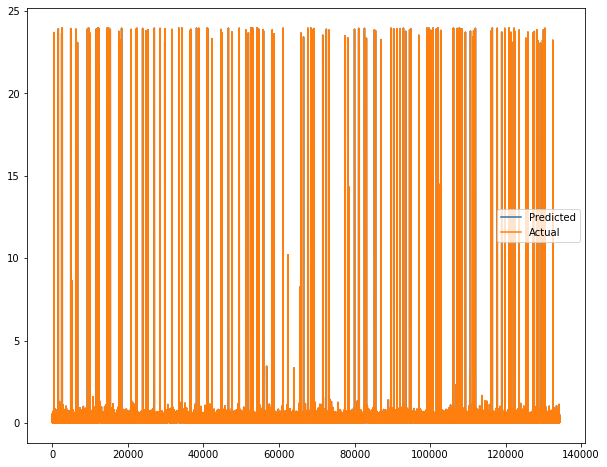

In [ ]:
plt.figure(figsize=(10,8))
plt.plot(10**(y_pred))
plt.plot(np.array(10**(y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

##Implementing Lasso Regression on linear regression

In [ ]:
from sklearn.linear_model import Lasso
lasso  = Lasso(alpha=0.1 , max_iter= 3000)

lasso.fit(X_train, y_train)

Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=3000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [ ]:
lasso.score(X_train, y_train)

0.8973627635648886

In [ ]:
y_pred_l = lasso.predict(X_test)

In [ ]:
MSE  = mean_squared_error(10**(y_test), 10**(y_pred_l))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score(10**(y_test), 10**(y_pred_l))
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score(10**(y_test), 10**(y_pred_l)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 0.3784041635915503
RMSE : 0.6151456442108245
R2 : 0.3680395009669899
Adjusted R2 :  0.36780882236797896


Feature: 0, Score: 0.00000
Feature: 1, Score: 0.00000
Feature: 2, Score: -0.00000
Feature: 3, Score: 0.00000
Feature: 4, Score: -0.00000
Feature: 5, Score: -0.00000
Feature: 6, Score: -0.00030
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.00030
Feature: 9, Score: -0.00000
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.31241
Feature: 12, Score: -0.00172
Feature: 13, Score: -0.00172
Feature: 14, Score: 0.00300
Feature: 15, Score: 0.00278
Feature: 16, Score: 0.00300
Feature: 17, Score: 0.00282
Feature: 18, Score: 0.00297
Feature: 19, Score: 0.00288
Feature: 20, Score: 0.00292
Feature: 21, Score: -0.00086
Feature: 22, Score: -0.00080
Feature: 23, Score: -0.00086
Feature: 24, Score: -0.00081
Feature: 25, Score: -0.00085
Feature: 26, Score: -0.00083
Feature: 27, Score: -0.00084
Feature: 28, Score: 0.00044
Feature: 29, Score: 0.00045
Feature: 30, Score: 0.00046
Feature: 31, Score: 0.00046
Feature: 32, Score: 0.00045
Feature: 33, Score: 0.00044
Feature: 34, Score: -0.00088
Feature: 35, Sc

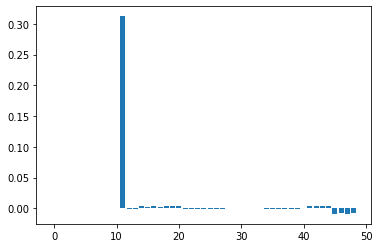

In [ ]:
import matplotlib.pyplot as plt 
importance = reg.coef_

# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))

# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

###Cross Validation on lasso

Implementing cross validation in our final dataframe

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
# Cross validation
lasso = Lasso()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100]}
lasso_regressor = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=3)
lasso_regressor.fit(X_train, y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [ ]:
print("The best fit alpha value is found out to be :" ,lasso_regressor.best_params_)
print("\nUsing ",lasso_regressor.best_params_, " the negative mean squared error is: ", lasso_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 1e-05}

Using  {'alpha': 1e-05}  the negative mean squared error is:  -6.274242122098239e-09


In [ ]:
y_pred_lasso = lasso_regressor.predict(X_test)

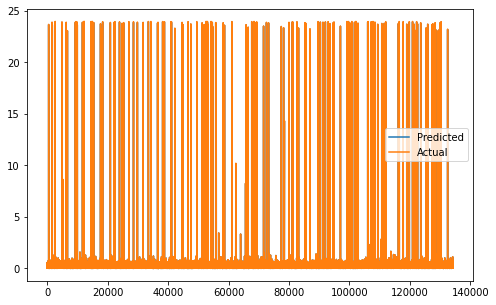

In [ ]:
plt.figure(figsize=(8,5))
plt.plot(10**(y_pred_lasso))
plt.plot(10**(np.array(y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

In [ ]:
MSE  = mean_squared_error(10**(y_test), 10**(y_pred_lasso))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score(10**(y_test), 10**(y_pred_lasso))
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score(10**(y_test), 10**(y_pred_lasso)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 1.5791400743391975e-06
RMSE : 0.001256638402381209
R2 : 0.999997362729469
Adjusted R2 :  0.999997361766811


In [ ]:
importance = lasso_regressor.feature_importances_

# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))

# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

##Implementing Ridge Regression

In [ ]:
from sklearn.linear_model import Ridge

ridge  = Ridge(alpha=0.1)

In [ ]:
ridge.fit(X_train,y_train)

Ridge(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [ ]:
ridge.score(X_train, y_train)

0.9999999999996807

In [ ]:
y_pred_r = ridge.predict(X_test)

In [ ]:
MSE  = mean_squared_error(10**(y_test), 10**(y_pred_r))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score(10**(y_test), 10**(y_pred_r))
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score(10**(y_test), 10**(y_pred_r)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 8.134680257813214e-12
RMSE : 2.8521360868326766e-06
R2 : 0.999999999986557
Adjusted R2 :  0.9999999999865521


###Cross Validation with Ridge Regression

In [ ]:
# Hyperprarameter tuning
ridge = Ridge()
parameters = {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1,5,10,20,30,40,45,50,55,60,100]}
ridge_regressor = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=3)
ridge_regressor.fit(X_train,y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 1e-05, 0.0001, 0.001,
                                   0.01, 1, 5, 10, 20, 30, 40, 45, 50, 55, 60,
                                   100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [ ]:
print("The best fit alpha value is found out to be :" ,ridge_regressor.best_params_)
print("\nUsing ",ridge_regressor.best_params_, " the negative mean squared error is: ", ridge_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 1e-15}

Using  {'alpha': 1e-15}  the negative mean squared error is:  -4.040622696844679e-31


In [ ]:
#Model Prediction
y_pred_ridge = ridge_regressor.predict(X_test)

In [ ]:
MSE  = mean_squared_error(10**(y_test), 10**(y_pred_ridge))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score(10**(y_test), 10**(y_pred_ridge))
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score(10**(y_test), 10**(y_pred_ridge)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 1.8184564577409344e-30
RMSE : 1.3485015601551725e-15
R2 : 1.0
Adjusted R2 :  1.0


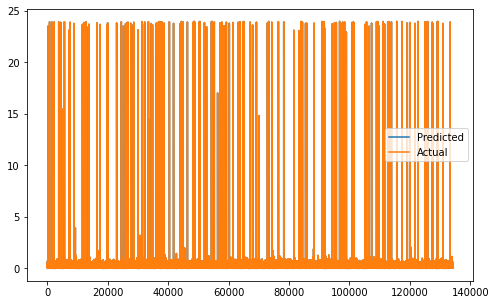

In [ ]:
plt.figure(figsize=(8,5))
plt.plot(10**(y_pred_ridge))
plt.plot(10**(np.array(y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

##Hetroscedasticity

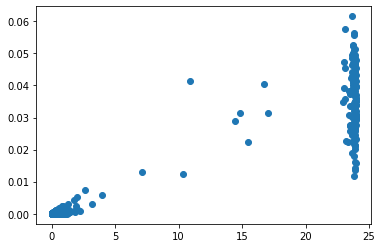

In [ ]:
### Heteroscadacity
plt.scatter(10**(y_pred_lasso),10**(y_test)-10**(y_pred_lasso))

#Decision Trees

In [ ]:
X = final_df[features]
y = final_df['trip_duration']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=324)

In [ ]:
from sklearn.tree import DecisionTreeRegressor
reg = DecisionTreeRegressor(criterion='mse', max_leaf_nodes=9, random_state=0)
reg.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=9,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=0, splitter='best')

In [ ]:
y_predicted = reg.predict(X_test)

In [ ]:
y_predicted[:10]

array([1776.41373978,  696.22420685,  323.0159937 ,  323.0159937 ,
       1168.0596766 ,  323.0159937 ,  696.22420685, 1168.0596766 ,
        323.0159937 ,  323.0159937 ])

## Visualising the DT

In [ ]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import tree
from IPython.display import SVG
from graphviz import Source
from IPython.display import display

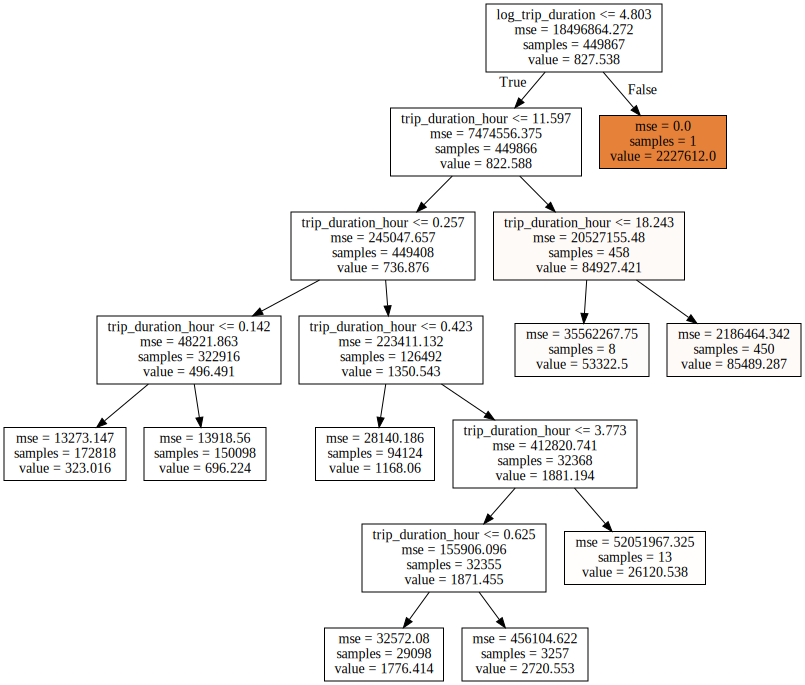

In [ ]:
graph = Source(tree.export_graphviz(reg, out_file=None,feature_names=X_train.columns, filled = True))
display(SVG(graph.pipe(format='svg')))

In [ ]:
from sklearn.model_selection import cross_val_score

print('Accuracy of Train Data :', cross_val_score(reg, X_train,y_train, cv=10 ))
print('Accuracy of Test Data :', cross_val_score(reg, X_test,y_test, cv=10 ))
predicted = reg.predict(X_test[:2])
print(predicted)

Accuracy of Train Data : [0.99637284 0.99691238 0.99653464 0.99683084 0.1301785  0.99718259
 0.99666233 0.99609792 0.9965778  0.99505786]
Accuracy of Test Data : [0.99554368 0.99675925 0.9945748  0.99750782 0.9976624  0.99706099
 0.99520436 0.99762937 0.9977822  0.99755911]
[1776.41373978  696.22420685]


##Regression Evaluation metrics.


In [ ]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [ ]:
#r2 train
rt2=r2_score(y_train, reg.predict(X_train))
rt2

0.9986287856393186

In [ ]:
#r2 test
r2=r2_score(y_test, y_predicted)
print(r2)


0.9966562699842959


In [ ]:
mse=mean_squared_error(y_test, y_predicted)
print(mse)

27361.57501882119


In [ ]:
rmse=(mean_squared_error(y_test, y_predicted))**0.5
print(rmse)

165.41334595135058


In [ ]:
#mae
mean_absolute_error (y_test,y_predicted)

115.26886898986086

In [ ]:
#MAPE
def mean_absolute_percentage_error(y_t, y_p): 
    y_t, y_p = np.array(y_t), np.array(y_p)
    return np.mean(np.abs((y_t - y_p) / y_t)) * 100



mean_absolute_percentage_error(y_test,y_predicted)

31.49844765482341

In [ ]:
#Adjusted R2 train
ntr=len(X_train)
ptr=len(X_train.columns)
adj_rt2 = 1-(1-rt2)*(ntr-1)/(ntr-ptr-1)
print(adj_rt2,ntr,ptr)

0.9986286362685662 449867 49


In [ ]:
#Adjusted R2 test
n=len(X_test)
p=len(X_test.columns)
adj_r2 = 1-(1-r2)*(n-1)/(n-p-1)
print(adj_r2,n,p)

0.9966555303779691 221577 49


,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,distance,trip_duration_hour,speed,log_distance,log_trip_duration,store_and_fwd_flag_N,store_and_fwd_flag_Y,pickup_day_Friday,pickup_day_Monday,pickup_day_Saturday,pickup_day_Sunday,pickup_day_Thursday,pickup_day_Tuesday,pickup_day_Wednesday,dropoff_day_Friday,dropoff_day_Monday,dropoff_day_Saturday,dropoff_day_Sunday,dropoff_day_Thursday,dropoff_day_Tuesday,dropoff_day_Wednesday,pickup_month_1,pickup_month_2,pickup_month_3,pickup_month_4,pickup_month_5,pickup_month_6,dropoff_month_1,dropoff_month_2,dropoff_month_3,dropoff_month_4,dropoff_month_5,dropoff_month_6,dropoff_month_7,pickup_timezone_evening,pickup_timezone_late night,pickup_timezone_midday,pickup_timezone_morning,dropoff_timezone_evening,dropoff_timezone_late night,dropoff_timezone_midday,dropoff_timezone_morning
1291114,1,1,-73.988647,40.722717,-73.996468,40.724014,455,0.419300,0.126389,3.317537,-0.869169,-2.068392,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0
672431,1,1,-73.975502,40.749485,-73.990997,40.733639,750,1.363006,0.208333,6.542427,0.309692,-1.568616,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0
1319121,2,1,-73.973877,40.764061,-73.955498,40.768379,839,1.007283,0.233056,4.322071,0.007256,-1.456478,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1253083,2,1,-73.984062,40.750229,-73.864792,40.770359,1865,6.396850,0.518056,12.347807,1.855806,-0.657673,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1
177892,2,1,-74.029648,40.754120,-74.029694,40.744850,180,0.640661,0.050000,12.813216,-0.445255,-2.995732,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
476680,2,1,-73.955841,40.803841,-73.939720,40.805328,433,0.849602,0.120278,7.063663,-0.162988,-2.117951,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0
892753,2,1,-74.006409,40.704262,-73.985352,40.741711,1200,2.813408,0.333333,8.440223,1.034396,-1.098612,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0
1153416,2,2,-73.978027,40.752319,-74.000427,40.762428,639,1.365021,0.177500,7.690261,0.311170,-1.728785,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1
1315351,2,1,-73.988045,40.732170,-73.973633,40.743610,533,1.093044,0.148056,7.382662,0.088967,-1.910168,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0
